# Home Sale Prices in Ames Iowa

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, we will predict the final price of a home.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

from matplotlib import rcParams
from joblib import dump, load
from operator import itemgetter
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error


rcParams['figure.figsize'] = 15,8
sns.set_theme(style="ticks", color_codes=True)
pd.set_option("display.max_columns", None)

## Data Exploration
The data is split into a training and test datasets. Both contain the same explanatory variables. The training dataset 
contains the actual sale price. The actual sales price will be used as the target/dependant variable for supervised learning.

* Import the data from CSV
* Print shape and columns to validate against data dictionary
* Print descriptive statistics for numeric and categorical columns

In [2]:
train = pd.read_csv('./data/train.csv')
#test = pd.read_csv('./data/test.csv')

In [3]:
print(train.shape)
#print(test.shape)

(1460, 81)


In [4]:
print(train.columns)
#print(test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## Feature Engineering

TODO:
* ~~YearRemodAdd: Change to 0 if the year is the same as built year~~
* MSSubClass: Label encode so these numbers are not influencing. It implies ordinal but is that right?
* What is going on with Exteriore and Exterior2
* Is 1stFlrSF and 2ndFlrSF redundant with overall sq ft
* GarageCars and GarageSQFt are the same?

In [7]:
train_features = train.iloc[:, 1:]


In [8]:
# Backup the original remodeled column
YearRemodAdd = train_features[train_features['YearRemodAdd'] == train_features['YearBuilt']][['YearRemodAdd']]

# Set Remodeled to 0 if it was never remodeled
train_features.loc[train_features['YearRemodAdd'] == train_features['YearBuilt'], 'YearRemodAdd'] = 0

# Check work
train_features[train_features['YearRemodAdd'] == train_features['YearBuilt']][['YearRemodAdd','YearBuilt']]

,YearRemodAdd,YearBuilt


In [9]:

# Backup the original exterior 2nd
Exterior2nd = train_features[train_features['Exterior1st'] == train_features['Exterior2nd']][['Exterior2nd']]

# Set exterior 2nd to NaN if it matches the first material
train_features.loc[train_features['Exterior1st'] == train_features['Exterior2nd'], 'Exterior2nd'] = 'NaN'

# Check work
train_features[train_features['Exterior1st'] == train_features['Exterior2nd']][['Exterior1st','Exterior2nd']]


,Exterior1st,Exterior2nd


In [10]:
GarageCars = train_features[['GarageCars']]

train_features = train_features.drop('GarageCars',axis=1)

In [11]:
# Get categorical vs numeric columns
categorical_columns = train_features.loc[:, 
    ~train_features.columns.isin(train_features.select_dtypes(include=np.number).columns.tolist())].columns.tolist()
numeric_columns = train_features.select_dtypes(include=np.number).columns.tolist()
 
print(categorical_columns)
print(numeric_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3Ss

### Categorical Columns 

All of the categorical features use NaN as the absense of the feature. We can safely convert them from np.nan to "NaN".

The exception is Electrical which does not explicitly call out a valid value for NA. There is only one record, so I decided to treat it the same as the others.

Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [12]:
for column in train_features.columns:
    if train_features[column].isna().sum() > 0:
        print("{} {}".format(column, train_features[column].isna().sum()))
        
for column in categorical_columns:
    train_features[column] = train_features[column].fillna("NaN")
        
# Electrical is the only anomaly

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


### Numeric Columns

After applying "NaN", it leaves three numerical features with np.nan. 

*TODO: Does deleting these or changing them to 0 the more appropriate transformation.*

In [13]:
for column in train_features.columns:
    if train_features[column].isna().sum() > 0:
        print("{} {}".format(column, train_features[column].isna().sum()))

LotFrontage 259
MasVnrArea 8
GarageYrBlt 81


In [14]:
for column in numeric_columns:
    train_features[column] = train_features[column].fillna(0)

for column in train_features.columns:
    if train_features[column].isna().sum() > 0:
        print("{} {}".format(column, train_features[column].isna().sum()))

### Pepare the training and testing features

Training data
* Split the dependant and independant variables
* Label encode categorical features

Testing data
* Label encode categorical features

Save the feature engineered training and testing data.

In [15]:
train_target = train_features.iloc[:, -1]
train_features = train_features.drop("SalePrice", axis=1)

In [16]:
from sklearn import preprocessing
label_enc = preprocessing.LabelEncoder()

for column in categorical_columns:
    train_features[column+"_labels"] = label_enc.fit_transform(train_features[column]).reshape((-1,1))

train_features = train_features.drop(categorical_columns, axis=1)


In [17]:
print(train_features.shape)
print(train_features.columns)
train_features.head()

(1460, 78)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_labels', 'Street_labels', 'Alley_labels',
       'LotShape_labels', 'LandContour_labels', 'Utilities_labels',
       'LotConfig_labels', 'LandSlope_labels', 'Neighborhood_labels',
       'Condition1_labels', 'Condition2_labels', 'BldgType_labels',
       'HouseStyle_labels', 'RoofStyle_labels', 'RoofMatl_labels',
       'Exterior1st_labels', 'Exterior2nd_labels', 'MasVnrType_labels',
       'ExterQual_labels', 'ExterCond_labels', 'Fo

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_labels,Street_labels,Alley_labels,LotShape_labels,LandContour_labels,Utilities_labels,LotConfig_labels,LandSlope_labels,Neighborhood_labels,Condition1_labels,Condition2_labels,BldgType_labels,HouseStyle_labels,RoofStyle_labels,RoofMatl_labels,Exterior1st_labels,Exterior2nd_labels,MasVnrType_labels,ExterQual_labels,ExterCond_labels,Foundation_labels,BsmtQual_labels,BsmtCond_labels,BsmtExposure_labels,BsmtFinType1_labels,BsmtFinType2_labels,Heating_labels,HeatingQC_labels,CentralAir_labels,Electrical_labels,KitchenQual_labels,Functional_labels,FireplaceQu_labels,GarageType_labels,GarageFinish_labels,GarageQual_labels,GarageCond_labels,PavedDrive_labels,PoolQC_labels,Fence_labels,MiscFeature_labels,SaleType_labels,SaleCondition_labels
0,60,65.0,8450,7,5,2003,0,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,548,0,61,0,0,0,0,0,2,2008,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,8,1,2,4,2,2,4,4,2,6,1,0,1,5,2,6,3,1,2,5,5,2,3,4,1,8,4
1,20,80.0,9600,6,8,1976,0,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,460,298,0,0,0,0,0,0,5,2007,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,3,3,4,1,2,4,1,0,6,1,0,1,5,3,6,5,1,2,5,5,2,3,4,1,8,4
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,608,0,42,0,0,0,0,0,9,2008,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,8,1,2,4,2,2,4,2,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,4,1,8,4
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,642,0,35,272,0,0,0,0,2,2006,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,3,3,4,0,4,1,4,0,6,1,2,1,5,2,6,2,5,3,5,5,2,3,4,1,8,0
4,60,84.0,14260,8,5,2000,0,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,836,192,84,0,0,0,0,0,12,2008,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,8,1,2,4,2,2,4,0,2,6,1,0,1,5,2,6,5,1,2,5,5,2,3,4,1,8,4


In [14]:
# test_features = test.iloc[:, 1:]
# for column in categorical_columns:
#     test_features[column+"_labels"] = label_enc.fit_transform(test_features[column]).reshape((-1,1))

# test_features = test_features.drop(categorical_columns, axis=1)

# print(test_features.shape)
# print(test_features.columns)
# test_features.head()

(1459, 79)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSZoning_labels', 'Street_labels', 'Alley_labels',
       'LotShape_labels', 'LandContour_labels', 'Utilities_labels',
       'LotConfig_labels', 'LandSlope_labels', 'Neighborhood_labels',
       'Condition1_labels', 'Condition2_labels', 'BldgType_labels',
       'HouseStyle_labels', 'RoofStyle_labels', 'RoofMatl_labels',
       'Exterior1st_labels', 'Exterior2nd_labels', 'MasVnrType_labels',
       'ExterQual_labels', 'ExterCon

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType_labels,GarageFinish_labels,GarageQual_labels,GarageCond_labels,PavedDrive_labels,PoolQC_labels,Fence_labels,MiscFeature_labels,SaleType_labels,SaleCondition_labels
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,1,2,3,4,2,2,2,3,8,4
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,1,2,3,4,2,2,4,0,8,4
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,1,0,3,4,2,2,2,3,8,4
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,1,0,3,4,2,2,4,3,8,4
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,1,1,3,4,2,2,4,3,8,4


In [18]:
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))

# Diff(test_features.columns, train_features.columns)

In [19]:
train_features.to_csv('./data/train_features.csv')
train_target.to_csv('./data/train_target.csv')
# test_features.to_csv('./data/test_features.csv')

## Model

* Split the training data into a training and testing dataesets
* Fit a Random Forest Regression model using default settings to achieve a baseline
* Find optimal Random Forest hyperparameters using grid search
* Fit a Gradient Descent model using default settings to achieve a baseline
* Find optimal Gradient Descent hyperparameters using grid search
* Compare all the results

In [20]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_target, test_size=0.2, random_state=0)

training_results = []

In [21]:
def evaluate_model(model_type, X_train, y_train, X_test, y_test, display=True, model_id=None):
    if model_type == 'rfr':
        model = RandomForestRegressor(random_state=0)
    elif model_type == 'gbr':
        model = GradientBoostingRegressor(random_state=0)
        
    model.fit(X_train, y_train)
    
    params = model.get_params()
    training_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    training_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    feature_importance = sorted([[t[1], t[0]] for t in zip(model.feature_importances_, 
                                                           X_train.columns[:-1]) if t[0]>-1], 
                                key=itemgetter(1),
                                reverse=True)

    if display == True:
        print(f'Best Hyper Parameters: {params}')
        print(f'Best Training Score: {training_score}')
        print(f'Best Test Score: {test_score}')
        print(f'Best Training MSE: {training_mse}')
        print(f'Best Test MSE: {test_mse}')
        print('Feature Importance: ')
        for feature in feature_importance:
            print(f'{feature[0]} {feature[1]}')
        
    return {
        'id': model_id,
        'params': params,
        'training_score': training_score,
        'test_score': test_score,
        'training_mse': training_mse,
        'test_mse': test_mse,
        'feature_importance': feature_importance
    }

def evaluate_search(model_type, search_type, X_train, y_train, X_test, y_test, 
                    display=True, model_id=None, hyper_params=None):
    if model_type == 'rfr':
        model = RandomForestRegressor(random_state=0)
    elif model_type == 'gbr':
        model = GradientBoostingRegressor(random_state=0)
        
    if search_type == 'random':
        search = RandomizedSearchCV(estimator=model, 
                               param_distributions=hyper_params, 
                               n_iter=50, 
                               cv=3, 
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1)
        
    elif search_type == 'grid':
         search = GridSearchCV(estimator=model, 
                               param_grid=hyper_params, 
                               cv=3, 
                               verbose=2, 
                               n_jobs=-1)
    
    %time search.fit(X_train, y_train)
    
    best_estimator = search.best_estimator_
    params = search.best_params_
    training_score = search.best_score_
    test_score = search.score(X_test, y_test)
    training_mse = mean_squared_error(y_train, search.best_estimator_.predict(X_train))
    test_mse = mean_squared_error(y_test, search.best_estimator_.predict(X_test))
    feature_importance = sorted([[t[1], t[0]] for t in zip(search.best_estimator_.feature_importances_, 
                                                           X_train.columns) if t[0] > 0], 
                                key=itemgetter(1),
                                reverse=True)
    
    if display == True:
        print(f'Best Hyper Parameters: {params}')
        print(f'Best Training Score: {training_score}')
        print(f'Best Test Score: {test_score}')
        print(f'Best Training MSE: {training_mse}')
        print(f'Best Test MSE: {test_mse}')
        print('Feature Importance: ')
        for feature in feature_importance:
            print(f'{feature[0]} {feature[1]}')
        
    return {
        "id": model_id,
        'params': params,
        'training_score': training_score,
        'test_score': test_score,
        'training_mse': training_mse,
        'test_mse': test_mse,
        'feature_importance': feature_importance,
        'best_estimator': best_estimator
    }

### Random Forest with default settings

With the default settings we achieve a high R2 but we notice overfitting.

In [22]:
training_results.append(evaluate_model('rfr', X_train, y_train, X_test, y_test, 
                                       display=True, model_id='rfr_default_1' ))

# Best Training Score: 0.9793566796642315
# Best Test Score: 0.8496613896865822


# Best Training Score: 0.9798190136729048
# Best Test Score: 0.8419166898910615
# Best Training MSE: 124253529.36438255
# Best Test MSE: 1091699621.4253774

Best Hyper Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Best Training Score: 0.9798190136729048
Best Test Score: 0.8419166898910615
Best Training MSE: 124253529.36438255
Best Test MSE: 1091699621.4253774
Feature Importance: 
OverallQual 0.5821866874617632
GrLivArea 0.12328478497348953
TotalBsmtSF 0.04397438602191705
BsmtFinSF1 0.02876674478830299
GarageArea 0.027909499795489755
1stFlrSF 0.021177622446369053
MasVnrArea 0.017437878525413227
LotArea 0.01336889230829845
YearBuilt 0.012315646560720364
2ndFlrSF 0.0109023163813314
GarageYrBlt 0.007303121709452043
TotRmsAbvGrd 0.006730690975207252
BsmtUnfSF 0.00601023121395072
YearRemodAd

In [23]:
# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

rnd_search_hyperparams = {
    'n_estimators': [int(x) for x in np.linspace(200,2000,20)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10,200,20)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

training_results.append(evaluate_search('rfr','random', X_train.loc[:, X_train.columns != 'GarageCars'], 
                                        y_train, X_test.loc[:, X_test.columns != 'GarageCars'], y_test, 
                    display=True, model_id='rfr_random_search_2', hyper_params=rnd_search_hyperparams))

# {'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
# 0.84588057840952
# 0.863701860424341

# Best Training Score: 0.869551363235575
# Best Test Score: 0.861968643942061

# Best Hyper Parameters: {'n_estimators': 957, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
# Best Training Score: 0.8703582873139183
# Best Test Score: 0.8543733142884122


# Best Hyper Parameters: {'n_estimators': 957, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
# Best Training Score: 0.8703582873139183
# Best Test Score: 0.8543733142884122
# Best Training MSE: 23465941.629056282
# Best Test MSE: 1005676042.2793269


Fitting 3 folds for each of 50 candidates, totalling 150 fits
CPU times: user 3.93 s, sys: 210 ms, total: 4.14 s
Wall time: 10min 46s
Best Hyper Parameters: {'n_estimators': 957, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Training Score: 0.8703582873139183
Best Test Score: 0.8543733142884122
Best Training MSE: 23465941.629056282
Best Test MSE: 1005676042.2793269
Feature Importance: 
OverallQual 0.12096050201914038
GrLivArea 0.09745750404177884
GarageArea 0.0692997024759609
TotalBsmtSF 0.06126745635289089
ExterQual_labels 0.056891245734954576
1stFlrSF 0.05332772156528514
YearBuilt 0.05290113797959669
BsmtQual_labels 0.045750868380115224
KitchenQual_labels 0.03465542492022749
GarageYrBlt 0.03355630330746226
BsmtFinSF1 0.031088935271284993
2ndFlrSF 0.028048296761483564
FullBath 0.027685688340443482
LotArea 0.023791421524807444
Fireplaces 0.023172112126472404
TotRmsAbvGrd 0.02306362416586465
MasVnrArea 0.0189505698560095

In [24]:
grid_search_hyperparams = {
    'n_estimators': [int(x) for x in np.linspace(900,1000,10)],
    'max_features': ['sqrt'],
    'max_depth': [int(x) for x in np.linspace(15,25,10)],
    'min_samples_split': [4,5],
    'min_samples_leaf': [1],
    'bootstrap': [False]
}


training_results.append(evaluate_search('rfr','grid', X_train, y_train, 
                                        X_test, y_test, 
                    display=True, model_id='rfr_grid_search_2', hyper_params=grid_search_hyperparams))

# {'bootstrap': False, 'max_depth': 20.0, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1500}
# 0.8473908208913908
# 0.8583913564216382

# Best Hyper Parameters: {'bootstrap': False, 'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
# Best Training Score: 0.8711283724411207
# Best Test Score: 0.8556805267161336

# Best Training Score: 0.8711283724411207
# Best Test Score: 0.8556805267161336
# Best Training MSE: 11686767.713880662
# Best Test MSE: 996648629.3824024


Fitting 3 folds for each of 200 candidates, totalling 600 fits
CPU times: user 5.79 s, sys: 311 ms, total: 6.1 s
Wall time: 12min 28s
Best Hyper Parameters: {'bootstrap': False, 'max_depth': 21, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 1000}
Best Training Score: 0.8711283724411207
Best Test Score: 0.8556805267161336
Best Training MSE: 11686767.713880662
Best Test MSE: 996648629.3824024
Feature Importance: 
OverallQual 0.12208617292314923
GrLivArea 0.09687307458322052
GarageArea 0.07128059158896254
TotalBsmtSF 0.057444507901089514
ExterQual_labels 0.057064593116552584
YearBuilt 0.05300970925587099
1stFlrSF 0.05198398566840949
BsmtQual_labels 0.044552936836383755
KitchenQual_labels 0.03463425368852232
BsmtFinSF1 0.033729124460709844
GarageYrBlt 0.03265290961275329
2ndFlrSF 0.026823325194029423
FullBath 0.02664350576486008
Fireplaces 0.024422682296619515
TotRmsAbvGrd 0.023303073536481242
LotArea 0.023049906629822595
MasVnrArea 0.02066968174707

In [28]:
pd.DataFrame(training_results)

,id,params,training_score,test_score,training_mse,test_mse,feature_importance,best_estimator
0,rfr_default_1,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.979819,0.841917,1.242535e+08,1.091700e+09,"[[OverallQual, 0.5821866874617632], [GrLivArea...",NaN
1,rfr_random_search_2,"{'n_estimators': 957, 'min_samples_split': 5, ...",0.870358,0.854373,2.346594e+07,1.005676e+09,"[[OverallQual, 0.12096050201914038], [GrLivAre...","(DecisionTreeRegressor(max_depth=20, max_featu..."
2,rfr_grid_search_2,"{'bootstrap': False, 'max_depth': 21, 'max_fea...",0.871128,0.855681,1.168677e+07,9.966486e+08,"[[OverallQual, 0.12208617292314923], [GrLivAre...","(DecisionTreeRegressor(max_depth=21, max_featu..."
3,gbr_default_1,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",0.969306,0.864719,1.889836e+08,9.342317e+08,"[[OverallQual, 0.5287005482204454], [GrLivArea...",NaN
4,gbr_random_search_1,"{'subsample': 0.2, 'n_estimators': 642, 'min_s...",0.886385,0.824368,2.669618e+08,1.212892e+09,"[[OverallQual, 0.34241354238110017], [GrLivAre...",([DecisionTreeRegressor(criterion='friedman_ms...
5,gbr_grid_search_1,"{'learning_rate': 0.01, 'max_depth': 25, 'max_...",0.888248,0.818979,4.115061e+08,1.250101e+09,"[[OverallQual, 0.25087510002042746], [GrLivAre...",([DecisionTreeRegressor(criterion='friedman_ms...


## Gradient Boosting Model

In [25]:
training_results.append(evaluate_model('gbr', X_train, y_train, X_test, y_test, 
                                       display=True, model_id='gbr_default_1' ))

# Best Hyper Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
# Best Training Score: 0.9693056998158942
# Best Test Score: 0.8647187893298622
# Best Training MSE: 188983584.2227599
# Best Test MSE: 934231743.8367293

Best Hyper Parameters: {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Best Training Score: 0.9693056998158942
Best Test Score: 0.8647187893298622
Best Training MSE: 188983584.2227599
Best Test MSE: 934231743.8367293
Feature Importance: 
OverallQual 0.5287005482204454
GrLivArea 0.14703182989597885
TotalBsmtSF 0.0543410046919061
BsmtFinSF1 0.03423377908817463
GarageArea 0.03078305320085454
YearBuilt 0.022625035519117542
LotArea 0.019678521593362284
BsmtQual_labels 0.017736599249902164
1stFlrSF 0.01221612321347635
MasVnrArea 0.011104415029443237
2ndFlrSF 0.0093416533444

In [26]:
rnd_search_gbm_hyperparams = {
    'n_estimators': [int(x) for x in np.linspace(200,3000,20)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10,300,50)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False],
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'subsample': [0.1,0.2, 0.3, 0.4,0.6,0.7,0.75,0.8,0.85,0.9],
    'min_impurity_decrease': [0] 
}

training_results.append(evaluate_search('gbr','random',X_train, y_train, X_test, y_test, 
                    display=True, model_id='gbr_random_search_1', hyper_params=rnd_search_gbm_hyperparams))

# {'subsample': 0.6, 'n_estimators': 936, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'max_features': 'auto', 'max_depth': 110, 'learning_rate': 0.01}
# 0.8549719800632639
# 0.9016905983858952

# Best Training Score: 0.8863852814379234
# Best Test Score: 0.8243675238565716
# Best Training MSE: 266961827.31029266
# Best Test MSE: 1212891529.0529516

Fitting 3 folds for each of 50 candidates, totalling 150 fits
CPU times: user 3.22 s, sys: 80.4 ms, total: 3.3 s
Wall time: 22min 41s
Best Hyper Parameters: {'subsample': 0.2, 'n_estimators': 642, 'min_samples_split': 5, 'min_samples_leaf': 4, 'min_impurity_decrease': 0, 'max_features': 'auto', 'max_depth': 33, 'learning_rate': 0.01}
Best Training Score: 0.8863852814379234
Best Test Score: 0.8243675238565716
Best Training MSE: 266961827.31029266
Best Test MSE: 1212891529.0529516
Feature Importance: 
OverallQual 0.34241354238110017
GrLivArea 0.13782909397476767
TotalBsmtSF 0.0654174656108076
BsmtFinSF1 0.042039419481943396
1stFlrSF 0.04077252142360576
GarageArea 0.035108955593574395
LotArea 0.0327873357230132
YearBuilt 0.02323034814328343
MasVnrArea 0.019200055699295716
2ndFlrSF 0.01911742580845423
FullBath 0.017828940945224563
BsmtUnfSF 0.01496101513277153
BsmtQual_labels 0.013431378481427591
TotRmsAbvGrd 0.013168678304481717
OpenPorchSF 0.013120735037257428
KitchenQual_labels 0.013087

In [27]:
grid_search_gbm_hyperparams = {
    'n_estimators': [int(x) for x in np.linspace(500,700,5)],
    'max_features': ['auto'],
    'max_depth': [int(x) for x in np.linspace(25,40,5)],
    'min_samples_split': [4,5,6],
    'min_samples_leaf': [4,5],
    #'bootstrap': [True, False],
    'learning_rate': [0.01],
    'subsample': [0.1],
    'min_impurity_decrease': [0] 
}

training_results.append(evaluate_search('gbr','grid',X_train, y_train, X_test, y_test, 
                    display=True, model_id='gbr_grid_search_1', hyper_params=grid_search_gbm_hyperparams))

Fitting 3 folds for each of 150 candidates, totalling 450 fits
CPU times: user 2.98 s, sys: 187 ms, total: 3.16 s
Wall time: 2min 25s
Best Hyper Parameters: {'learning_rate': 0.01, 'max_depth': 25, 'max_features': 'auto', 'min_impurity_decrease': 0, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 700, 'subsample': 0.1}
Best Training Score: 0.8882483329393381
Best Test Score: 0.8189794384508029
Best Training MSE: 411506081.0336703
Best Test MSE: 1250100838.4584284
Feature Importance: 
OverallQual 0.25087510002042746
GrLivArea 0.14358914080005616
TotalBsmtSF 0.08488356730212918
BsmtFinSF1 0.0458113907413099
1stFlrSF 0.04562816121514733
GarageArea 0.04277764325701979
LotArea 0.039907568606151196
YearBuilt 0.037878873090252604
MasVnrArea 0.02369818088746514
2ndFlrSF 0.02102104222321876
ExterQual_labels 0.016488564735342975
LotFrontage 0.01596115838802305
OpenPorchSF 0.015556164390122664
GarageYrBlt 0.014431513306353658
BsmtUnfSF 0.013639679800179749
TotRmsAbvGrd 0.0135252280

## Conclusion

Chose the model that converged training and test R^2 closest.

For the higher priced homes, the model tends to predict a lower value.

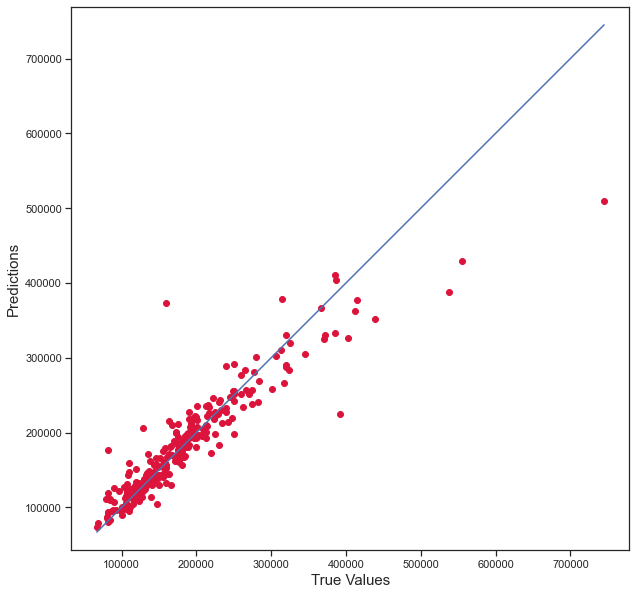

In [34]:
df_training_results = pd.DataFrame(training_results)

#df_training_results[df_training_results['id'] == 'rfr_grid_search_2']

#training_results[2].best_estimator.

true_value = y_test
predicted_value = training_results[2]['best_estimator'].predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(true_value, predicted_value, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Appendex / Errata

In [48]:
def tune_gbm(X, y, learning_rate, max_depth, n_estimators=10000):
    gbm = ensemble.GradientBoostingRegressor(
        learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    gbm.fit(X, y)
    
    return gbm


def demo_gbm_tuning(model, X_train, X_test, start=0, end=10000, training_curve=True):
    gen_train = model.staged_predict(X_train)
    gen_test  = model.staged_predict(X_test)

    trainMSE = []
    testMSE  = []
    steps   = range(1,10001)
    for n in steps:
        y_pred_train = next(gen_train)
        y_pred_test  = next(gen_test)
        trainMSE.append(mean_squared_error(y_pred_train, Y_train_reg))
        testMSE.append(mean_squared_error(y_pred_test, Y_test_reg))
    
    print("The best test score is {:.2f} at the step {}".format(
        min(testMSE), np.argmin(testMSE)+1))
    print('-'*50)
    plt.plot(range(start, end), testMSE[start:end])
    if training_curve:
        plt.plot(range(start, end), trainMSE[start:end])

The best test score is 621213428.85 at the step 100
The best r2 test score is 0.8925113342750215 at the step 100
--------------------------------------------------


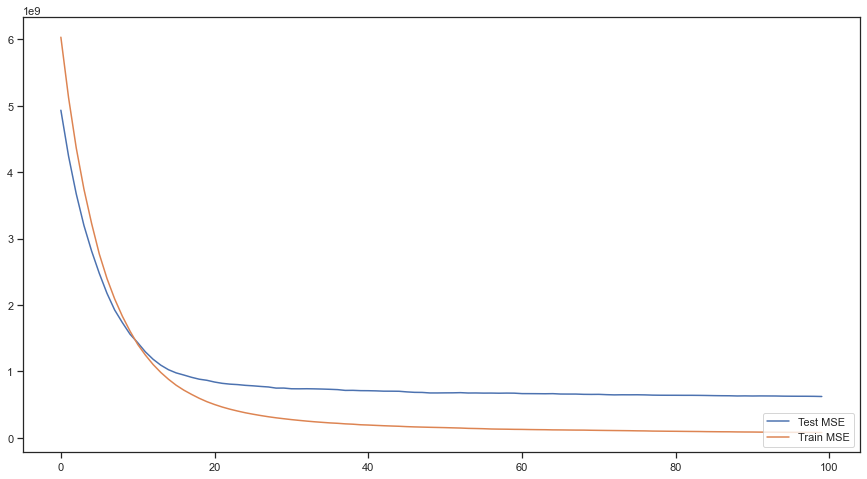

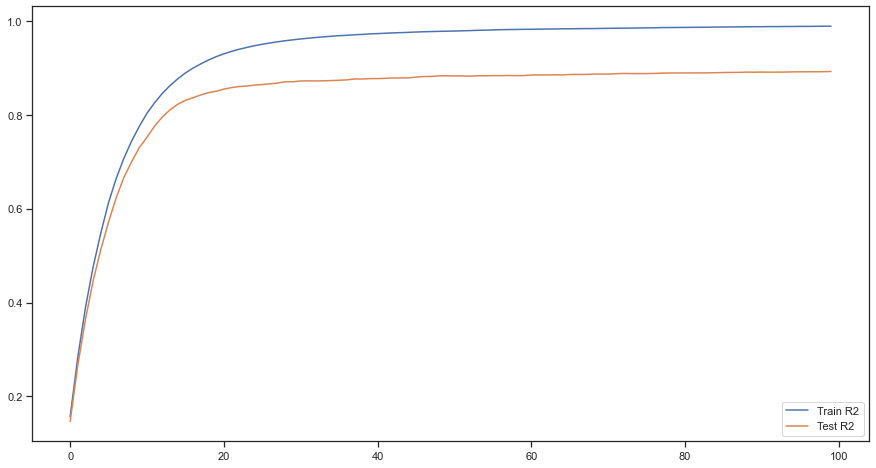

In [87]:
from sklearn.metrics import mean_squared_error, r2_score

learning_rate=.1
max_depth=4
n_estimators = 100

start=0
n_estimators=100

gbr_lr001_md4 = ensemble.GradientBoostingRegressor(
    learning_rate=learning_rate, 
    n_estimators=n_estimators, 
    max_depth=max_depth)

gbr_lr001_md4.fit(X_train, y_train)

gen_train = gbr_lr001_md4.staged_predict(X_train)
gen_test  = gbr_lr001_md4.staged_predict(X_test)

trainMSE = []
testMSE  = []
trainr2 = []
testr2 = []
steps   = range(1,n_estimators+1)
for n in steps:
    y_pred_train = next(gen_train)
    y_pred_test  = next(gen_test)
    trainMSE.append(mean_squared_error(y_pred_train, y_train))
    testMSE.append(mean_squared_error(y_pred_test, y_test))
    trainr2.append(r2_score(y_train, y_pred_train))
    testr2.append(r2_score(y_test, y_pred_test))

print("The best test score is {:.2f} at the step {}".format(
    min(testMSE), np.argmin(testMSE)+1))
print("The best r2 test score is {} at the step {}".format(
    max(testr2), np.argmax(testr2)+1))
print('-'*50)
plt.figure(0)
plt.plot(range(start, end), testMSE[start:end], label="Test MSE")
plt.plot(range(start, end), trainMSE[start:end], label="Train MSE")
plt.legend(loc=4)

plt.figure(1)
plt.plot(range(start, end), trainr2[start:end], label="Train R2")
plt.plot(range(start, end), testr2[start:end], label="Test R2")
plt.legend(loc=4)

# gbr_lr001_md4.fit(X_train, y_train)
# print(gbr_lr001_md4.score(X_train, y_train))
# print(gbr_lr001_md4.score(X_test, y_test))

In [93]:
import sklearn.model_selection as ms

grid_para_gbr = {
    #'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 31),
    'n_estimators': range(0, 25, 2),
    'learning_rate': [.1, .01, .001, .0001]
}

grid_search_gbr = ms.GridSearchCV(gbr, grid_para_gbr, cv=3, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

print(grid_search_forest.best_params_)
print(grid_search_forest.best_score_)



CPU times: user 27.3 s, sys: 2.61 s, total: 29.9 s
Wall time: 52min 37s
{'max_depth': 17, 'n_estimators': 17}
0.8462550689567854


### Linear Regression

#### Further feature engineering for Linear Regression

We need to encode the independant variables:
* Remove colinearity (not done)
* Onehot encode the categorical variables
* Standardize all the independant variables

In [45]:
train_features_onehot = pd.get_dummies(train_features, 
                                columns=[column+'_labels' for column in categorical_columns], 
                                drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features_onehot[train_features_onehot.columns] = scaler.fit_transform(train_features_onehot)

X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(train_features_onehot, 
                                                                                train_target, 
                                                                                test_size=0.2, 
                                                                                random_state=0)

Diff(X_train_onehot.columns, X_test_onehot.columns)


[]

In [46]:
train_features_onehot.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_labels_4,SaleType_labels_5,SaleType_labels_6,SaleType_labels_7,SaleType_labels_8,SaleCondition_labels_1,SaleCondition_labels_2,SaleCondition_labels_3,SaleCondition_labels_4,SaleCondition_labels_5
0,0.092295,-0.233570,-0.205885,0.570704,-0.525499,0.992930,0.823953,0.462009,0.571581,-0.282645,...,-0.051801,-0.059842,-0.339739,-0.029881,0.419864,-0.029881,-0.089964,-0.127746,0.491343,-0.344619
1,-0.865696,0.384834,-0.064358,-0.153825,2.284122,0.120665,-0.460746,-0.572748,1.152559,-0.282645,...,-0.051801,-0.059842,-0.339739,-0.029881,0.419864,-0.029881,-0.089964,-0.127746,0.491343,-0.344619
2,0.092295,-0.109889,0.138702,0.570704,-0.525499,0.928317,0.776371,0.282510,0.101672,-0.282645,...,-0.051801,-0.059842,-0.339739,-0.029881,0.419864,-0.029881,-0.089964,-0.127746,0.491343,-0.344619
3,0.331793,-0.439705,-0.070512,0.570704,-0.525499,-1.850006,-0.746235,-0.572748,-0.475034,-0.282645,...,-0.051801,-0.059842,-0.339739,-0.029881,0.419864,-0.029881,-0.089964,-0.127746,-2.035240,-0.344619
4,0.092295,0.549742,0.509132,1.295234,-0.525499,0.896011,0.681208,1.275032,0.462647,-0.282645,...,-0.051801,-0.059842,-0.339739,-0.029881,0.419864,-0.029881,-0.089964,-0.127746,0.491343,-0.344619


In [47]:
ridge = Ridge()
lasso = Lasso()
ridge.set_params(normalize=True)
lasso.set_params(normalize=True)
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0.01, 1, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train_onehot, y_train)
            lasso.fit(X_train_onehot, y_train)
            ridge_scores_train.append(ridge.score(X_train_onehot, y_train))
            ridge_scores_test.append(ridge.score(X_test_onehot, y_test))
            lasso_scores_train.append(lasso.score(X_train_onehot, y_train))
            lasso_scores_test.append(lasso.score(X_test_onehot, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 169095344694.22113, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 167740111382.32336, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 166378017717.04236, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWar

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 129396157607.06178, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127933264289.58582, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126468099196.8609, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarn

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86660011463.49565, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85184110340.12633, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 83709700633.71027, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45180417463.86435, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43841688933.63071, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42511322813.94095, tolerance: 640857354.4376187
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarnin

ValueError: zero-size array to reduction operation maximum which has no identity

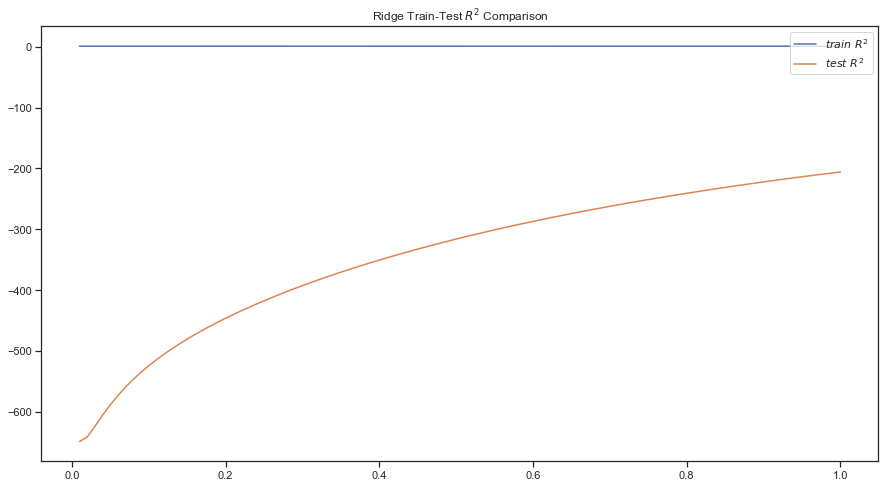

In [48]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
last_underfit  = np.max(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

ValueError: zero-size array to reduction operation maximum which has no identity

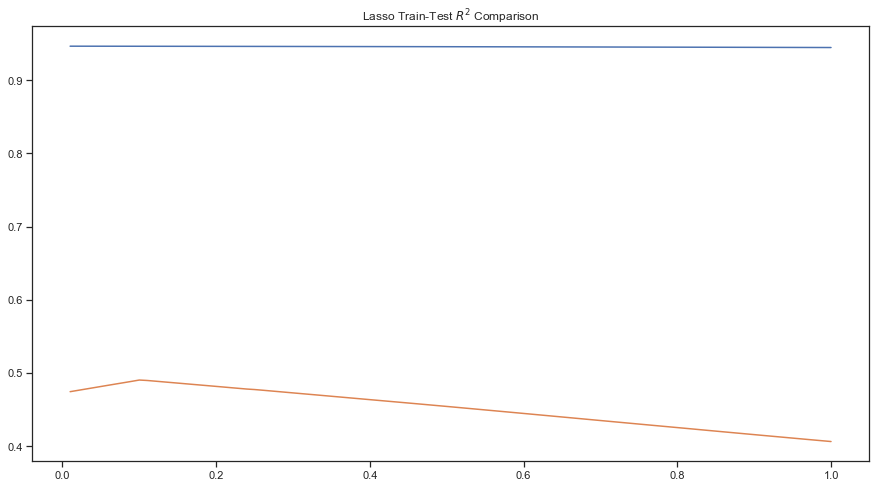

In [41]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

In [52]:
linear = LinearRegression()

linear.fit(X_train_onehot, y_train_onehot)
print(linear.score(X_train_onehot, y_train_onehot))
print(linear.score(X_test_onehot, y_test_onehot))

0.9461209809840262
-7.861555078147544e+21
